# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Importing packages
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE, ADASYN
from numpy import sort
import lightgbm as lgb
import xgboost as xgb
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from google.colab import files
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (15,3)

### Read files

In [2]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

### Some basic EDA

In [3]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [4]:
# Preview the first five rows of the train set
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Preview the first five rows of the test set
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [6]:
# Preview the first five rows of the sample submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [7]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (23524, 13)
The shape of the test set is: (10086, 12)


## Combine train and test set for easy preprocessing 

In [8]:
# mapping the bank account with 0 to NO and 1 to YES
train['bank_account'] = train['bank_account'].map({'No':0, 'Yes':1})

In [9]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (33610, 13)


In [11]:
# Preview the last five rows of the combined dataframe
all_data.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
33605,Uganda,2018,uniqueid_2998,NaN,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
33606,Uganda,2018,uniqueid_2999,NaN,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
33607,Uganda,2018,uniqueid_3000,NaN,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
33608,Uganda,2018,uniqueid_3001,NaN,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed
33609,Uganda,2018,uniqueid_3002,NaN,Urban,Yes,7,16,Male,Other relative,Single/Never Married,Secondary education,Other Income


In [12]:
all_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1.0,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0.0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1.0,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0.0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0.0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [13]:
all_data.shape

(33610, 13)

In [14]:
# Check the column names and datatypes
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 33610 non-null  object 
 1   year                    33610 non-null  int64  
 2   uniqueid                33610 non-null  object 
 3   bank_account            23524 non-null  float64
 4   location_type           33610 non-null  object 
 5   cellphone_access        33610 non-null  object 
 6   household_size          33610 non-null  int64  
 7   age_of_respondent       33610 non-null  int64  
 8   gender_of_respondent    33610 non-null  object 
 9   relationship_with_head  33610 non-null  object 
 10  marital_status          33610 non-null  object 
 11  education_level         33610 non-null  object 
 12  job_type                33610 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 3.3+ MB


* Missing values in the target variables

In [15]:
cat_feat=['country','location_type','cellphone_access', 'gender_of_respondent','relationship_with_head', 'marital_status', 'education_level','job_type']

In [16]:
target=['bank_account']

In [17]:
data_id=all_data['uniqueid']

In [18]:
all_data.drop('uniqueid', axis=1,inplace=True)

In [19]:
num_feat=[x for x in all_data.columns if x not in cat_feat+target]

In [20]:
all_data

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1.0,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0.0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1.0,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0.0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0.0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
33605,Uganda,2018,NaN,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
33606,Uganda,2018,NaN,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
33607,Uganda,2018,NaN,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
33608,Uganda,2018,NaN,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [21]:
num_feat

['year', 'household_size', 'age_of_respondent']

### Distribution of the target variable

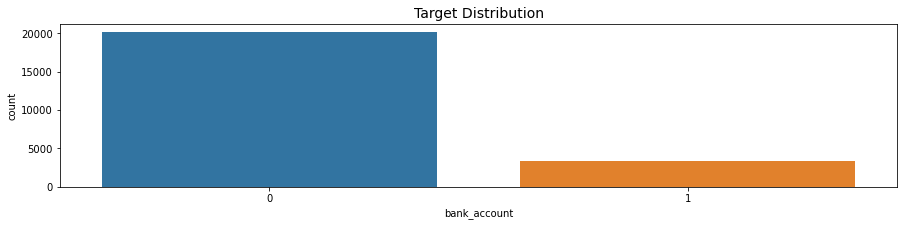

In [22]:
sns.countplot(train.bank_account)
plt.title('Target Distribution', fontdict={'size':14});

In [23]:
train['bank_account'].value_counts(normalize=True)

0    0.859208
1    0.140792
Name: bank_account, dtype: float64

We noticed moderate imbalanced distribution in the target data 

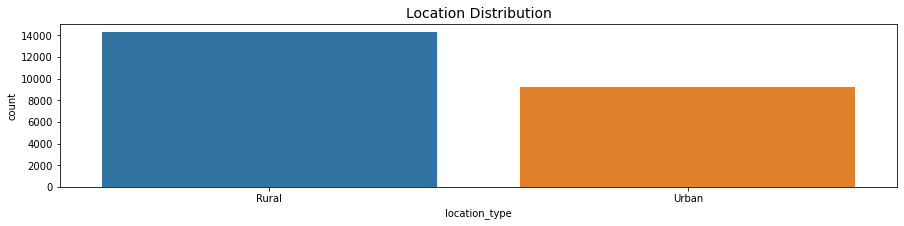

In [24]:
sns.countplot(train.location_type)
plt.title('Location Distribution', fontdict={'size':14});

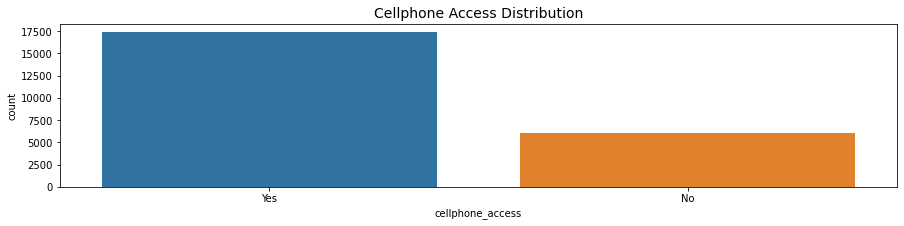

In [25]:
sns.countplot(train.cellphone_access)
plt.title('Cellphone Access Distribution', fontdict={'size':14});

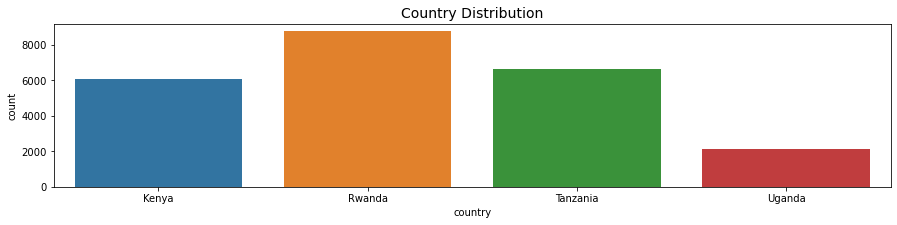

In [26]:
sns.countplot(train.country)
plt.title('Country Distribution', fontdict={'size':14});

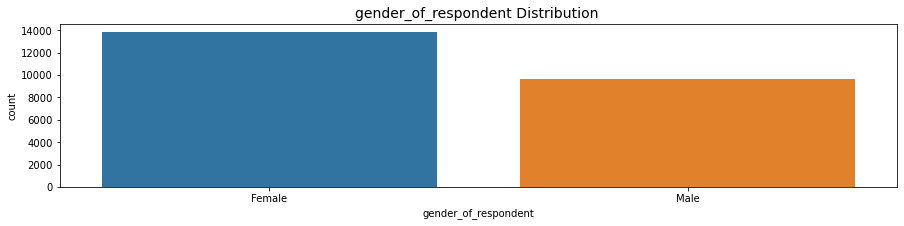

In [27]:
sns.countplot(train.gender_of_respondent)
plt.title('gender_of_respondent Distribution ', fontdict={'size':14});

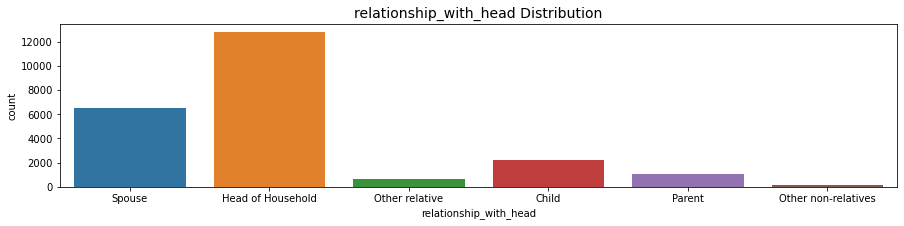

In [28]:
sns.countplot(train.relationship_with_head)
plt.title('relationship_with_head Distribution', fontdict={'size':14});

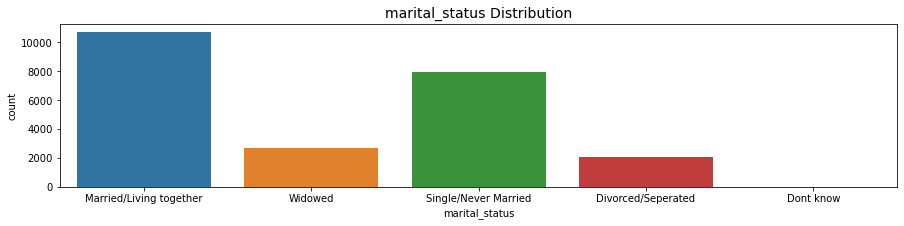

In [29]:
sns.countplot(train.marital_status)
plt.title('marital_status Distribution', fontdict={'size':14});

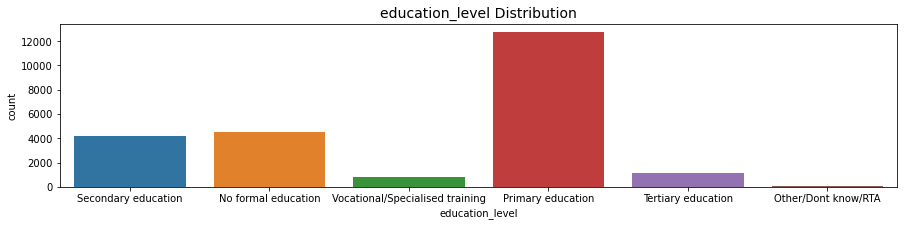

In [30]:
sns.countplot(train.education_level)
plt.title('education_level Distribution', fontdict={'size':14});

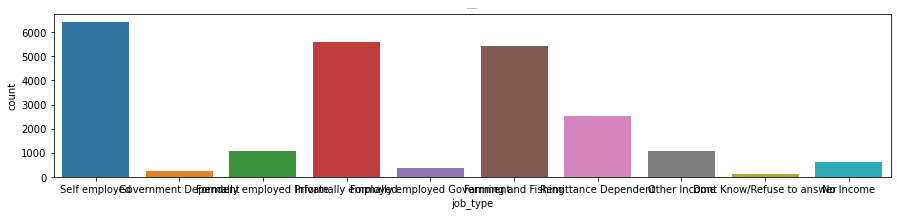

In [31]:
sns.countplot(train.job_type)
plt.title('job_type Distribution', fontdict={'size':1});

Here we see the overall distribution for the whole train set. Can you see if there are any differences due to country?

### Number of unique values per categorical column

In [32]:
# Check unique values for each categorical column
cat_cols = ['country','location_type','cellphone_access','gender_of_respondent','relationship_with_head', 'marital_status', 'education_level','job_type']
for col in cat_cols:
  print(col)
  print(train[col].unique(), '\n')
  print(train[col].value_counts(normalize=True), '\n')
  print()

country
['Kenya' 'Rwanda' 'Tanzania' 'Uganda'] 

Rwanda      0.371323
Tanzania    0.281415
Kenya       0.257949
Uganda      0.089313
Name: country, dtype: float64 


location_type
['Rural' 'Urban'] 

Rural    0.609718
Urban    0.390282
Name: location_type, dtype: float64 


cellphone_access
['Yes' 'No'] 

Yes    0.741966
No     0.258034
Name: cellphone_access, dtype: float64 


gender_of_respondent
['Female' 'Male'] 

Female    0.589908
Male      0.410092
Name: gender_of_respondent, dtype: float64 


relationship_with_head
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives'] 

Head of Household      0.545443
Spouse                 0.277164
Child                  0.094754
Parent                 0.046166
Other relative         0.028397
Other non-relatives    0.008077
Name: relationship_with_head, dtype: float64 


marital_status
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know'] 

Married/Living together    0.

## Distribution of numerical features 

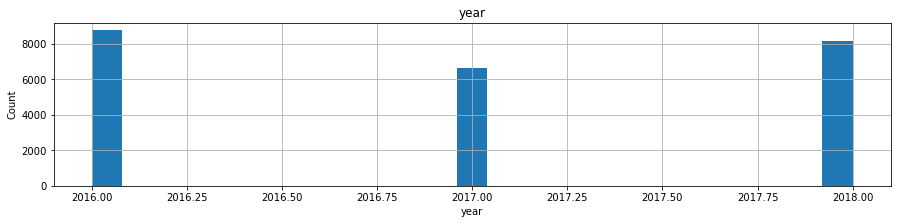

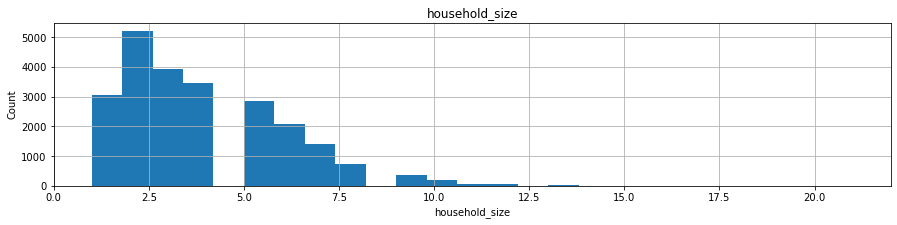

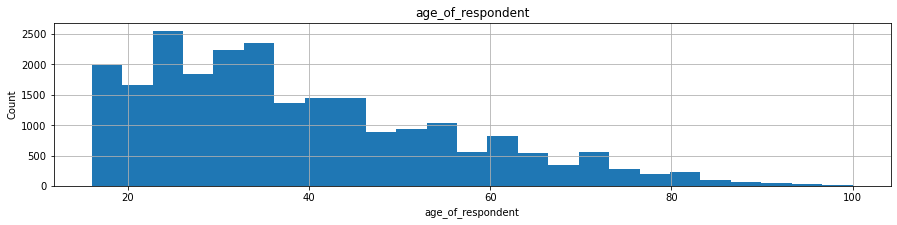

In [33]:

for feature in num_feat:
    train[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


## Checking for outliers 

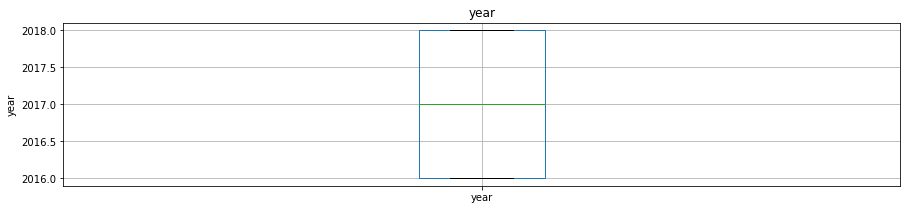

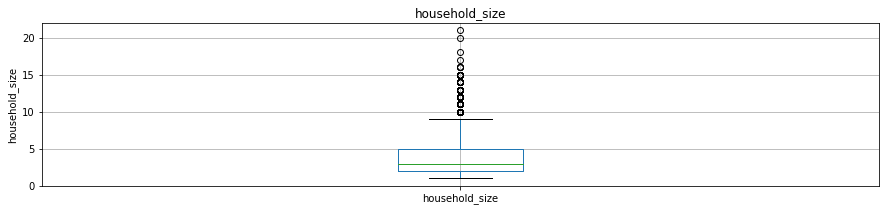

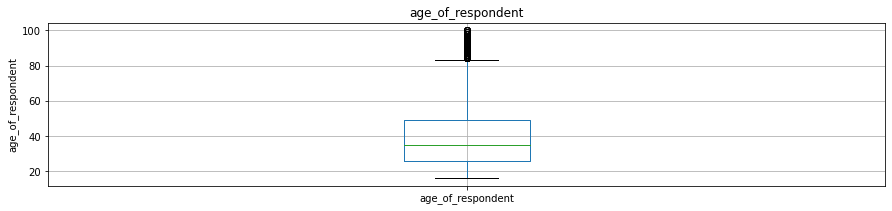

In [34]:
for feature in num_feat:
        train.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Bivariate Analysis 

In [35]:
def Boxplot_Bivariate(data, cont, cat):
    sns.boxplot(x=cat, y=cont, data=data, orient='h')
    plt.title('Bivariate boxplot')
    plt.show()
  

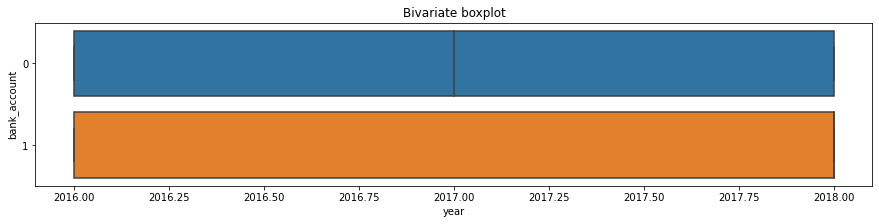

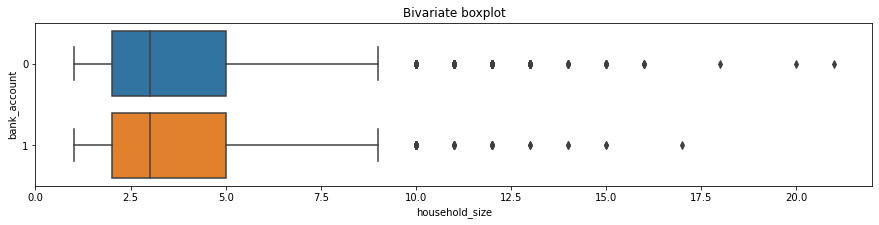

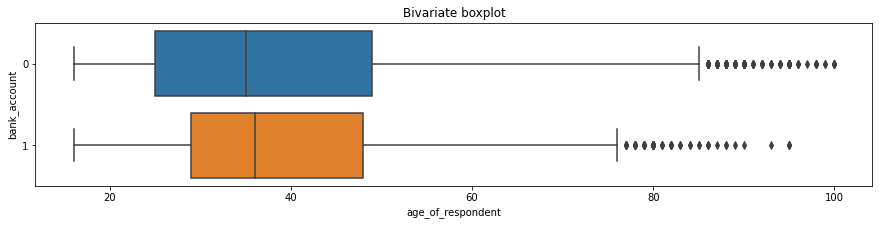

In [36]:
for col1 in num_feat:
        Boxplot_Bivariate(train, train.bank_account, col1)
        

In [37]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

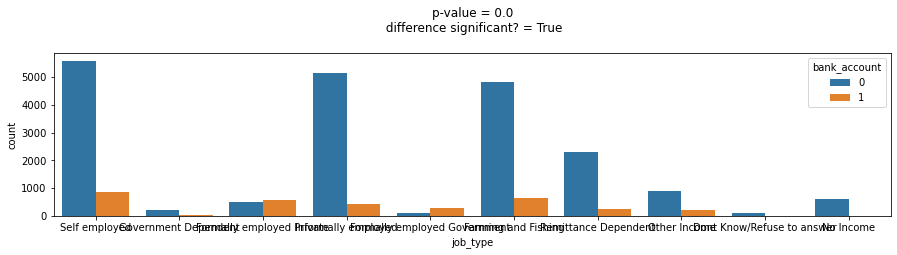

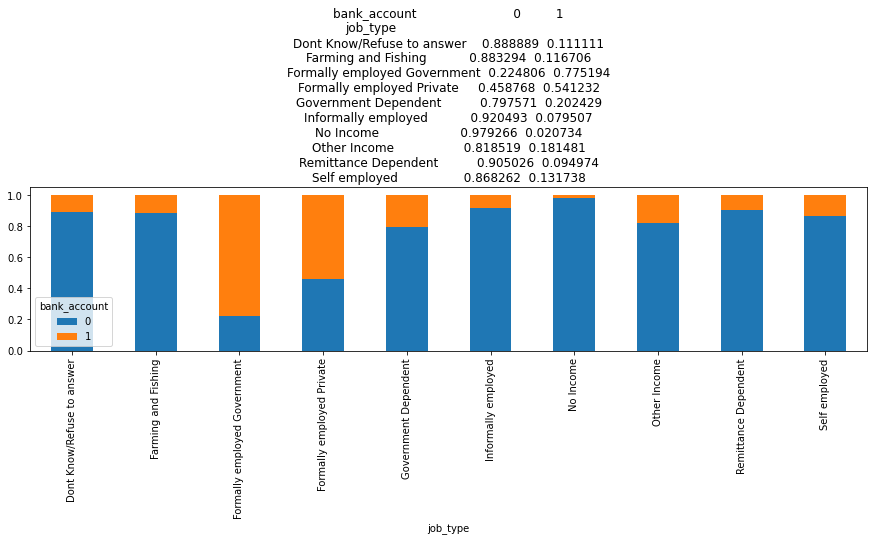

In [38]:
BVA_categorical_plot(train,'bank_account', cat_feat[7] )

In [39]:
train[train['marital_status']=='Dont know']

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
1156,Kenya,2018,uniqueid_1157,0,Rural,Yes,1,50,Male,Head of Household,Dont know,Primary education,Informally employed
2262,Kenya,2018,uniqueid_2263,0,Urban,Yes,1,77,Male,Head of Household,Dont know,Primary education,Remittance Dependent
2609,Kenya,2018,uniqueid_2610,1,Urban,Yes,2,34,Male,Head of Household,Dont know,Secondary education,Formally employed Private
2781,Kenya,2018,uniqueid_2782,0,Rural,Yes,4,35,Male,Child,Dont know,No formal education,Farming and Fishing
2981,Kenya,2018,uniqueid_2982,0,Urban,No,1,58,Male,Head of Household,Dont know,Primary education,Informally employed
4778,Kenya,2018,uniqueid_4779,0,Rural,Yes,3,25,Male,Other relative,Dont know,Primary education,Self employed
5033,Kenya,2018,uniqueid_5034,1,Urban,Yes,1,33,Male,Head of Household,Dont know,Primary education,Self employed
5295,Kenya,2018,uniqueid_5296,0,Urban,Yes,8,36,Female,Head of Household,Dont know,Primary education,Informally employed


In [40]:
train[train['gender_of_respondent']=='Male']

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
8,Kenya,2018,uniqueid_9,1,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,1,Rural,Yes,3,69,Male,Head of Household,Married/Living together,Secondary education,Other Income
14,Kenya,2018,uniqueid_15,0,Urban,Yes,4,26,Male,Head of Household,Married/Living together,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23506,Uganda,2018,uniqueid_2096,0,Rural,No,7,22,Male,Child,Single/Never Married,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,0,Rural,No,6,16,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,0,Urban,Yes,3,35,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,0,Urban,Yes,9,16,Male,Parent,Single/Never Married,Primary education,Other Income


In [41]:
all_data.education_level.isnull().sum()

0

In [42]:
all_data.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1.0,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0.0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1.0,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0.0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0.0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


### Feature Engineering


#### Try different strategies of dealing with categorical variables
Tips:
 - One hot encoding
 - Label encoding
 - Target encoding
 - Reduce the number of unique values...

##  One hot encoding 

In [43]:
from sklearn import base
from sklearn.model_selection import KFold

In [44]:
# Encode categorical features
all_data = pd.get_dummies(data = all_data, columns = cat_cols)
all_data.head

<bound method NDFrame.head of        year  bank_account  household_size  age_of_respondent  country_Kenya  \
0      2018           1.0               3                 24              1   
1      2018           0.0               5                 70              1   
2      2018           1.0               5                 26              1   
3      2018           0.0               5                 34              1   
4      2018           0.0               8                 26              1   
...     ...           ...             ...                ...            ...   
33605  2018           NaN               2                 62              0   
33606  2018           NaN               8                 42              0   
33607  2018           NaN               1                 39              0   
33608  2018           NaN               6                 28              0   
33609  2018           NaN               7                 16              0   

       country_Rwanda

In [45]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((23524, 41), (10086, 41))

In [46]:
# Separate train and test data from the combined dataframe
#train_df = all_data[:ntrain]
#test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((23524, 41), (10086, 41))

In [47]:
train_df

,year,bank_account,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,1.0,3,24,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,0.0,5,70,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,1.0,5,26,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2018,0.0,5,34,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,0.0,8,26,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,0.0,4,48,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
23520,2018,0.0,2,27,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
23521,2018,0.0,5,27,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
23522,2018,0.0,7,30,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


## Corrleation Matrix 

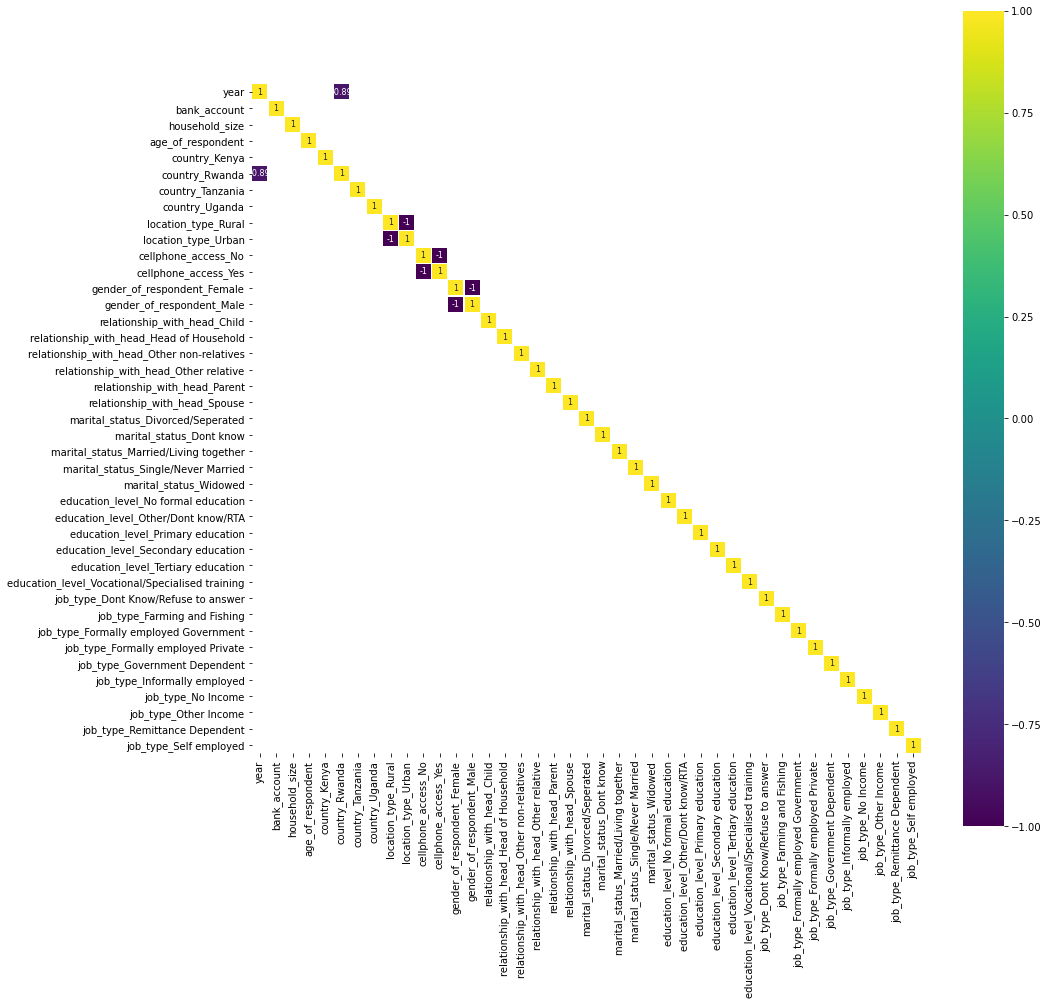

In [48]:
corr = train_df.corr() 
plt.figure(figsize=(15, 15))

sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [49]:
abs(corr['bank_account']).sort_values()

marital_status_Dont know                           0.005791
job_type_Dont Know/Refuse to answer                0.006262
relationship_with_head_Other non-relatives         0.009218
job_type_Self employed                             0.015978
job_type_Government Dependent                      0.018255
education_level_Other/Dont know/RTA                0.019255
age_of_respondent                                  0.019429
relationship_with_head_Other relative              0.020639
marital_status_Divorced/Seperated                  0.025114
job_type_Other Income                              0.025663
household_size                                     0.028326
job_type_Farming and Fishing                       0.037986
marital_status_Single/Never Married                0.040771
job_type_Remittance Dependent                      0.045701
country_Uganda                                     0.049200
relationship_with_head_Child                       0.050423
relationship_with_head_Parent           

You can remove the variable 'year' since it is highly corrleated with 'Rwanda'

### Training and making predictions
Tips:
- Is lgbm the best model for this challenge?
- Parameter tuning
 - Grid search, random search, perhaps bayesian search works better...



## Baseline Model

In [50]:
from sklearn.metrics import f1_score
from xgboost.sklearn import XGBClassifier
# Select main columns to be used in training
#main_cols = all_data.columns.difference(date_cols+['ID', 'bank_account'])
# 'year', 'marital_status_Dont know' ,'job_type_Dont Know/Refuse to answer' ,                           
#'relationship_with_head_Other non-relatives' 'education_level_Other/Dont know/RTA'
main_cols = train_df.columns.difference(['uniqueid', 'bank_account', 'year','education_level_Other/Dont know/RTA' ,
                                         'relationship_with_head_Other_non-relatives' ])
X = train_df[main_cols]
y= train_df['bank_account']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train model
model = LGBMClassifier(is_unbalance=True,random_state=0 )  
#model=DecisionTreeClassifier( max_depth = 10, random_state=42)
#model=XGBClassifier( max_depth = 9, n_jobs = -1,seed = 32)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the accuracy score of the model
print ('LGBM Accuracy ', accuracy_score(y_pred,y_test))

LGBM Accuracy  0.8026353074525361


In [51]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold 
from imblearn.combine import SMOTETomek

## Use Smote Technique 

In [52]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTETomek(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 2327
Before OverSampling, counts of label '0': 14139 

After OverSampling, the shape of train_X: (28012, 38)
After OverSampling, the shape of train_y: (28012,) 

After OverSampling, counts of label '1': 14006
After OverSampling, counts of label '0': 14006


In [53]:
y_train

19929    0.0
13449    1.0
5449     0.0
6956     0.0
2737     0.0
        ... 
11964    0.0
21575    0.0
5390     1.0
860      1.0
15795    0.0
Name: bank_account, Length: 16466, dtype: float64

In [54]:
# A function to run train and test for each model
def run_model(name, model, X_train, Y_train, X_valid, Y_valid, verbose=True):   
    
    if verbose: print(f"{name}")
    model.fit(X_train, Y_train)
        
                        
        # Get the class probabilities of the input samples        
    train_pred = model.predict(X_valid)
       
    acc = accuracy_score(Y_valid, train_pred)
    
    # Compute the mean
    if verbose:
        print("Accuracy : %.4g" % (acc))
    

    # Return the last version 
    return (model, acc)

In [55]:
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
models = {}

models['LogisticRegression'] = LogisticRegression()
#models['Support Vecotr Machine']= SVC() 
#models['KNN']= KNeighborsClassifier()
models['RandomForest'] = RandomForestClassifier(random_state=0, n_jobs=-1)
#models['LinearDiscriminantAnalysis'] = LinearDiscriminantAnalysis()
models['LGBMClassifier'] = lgb.LGBMClassifier(random_state=0 ) 
models['Decision Tree' ]=DecisionTreeClassifier( random_state=0)
models['XGBClassifier'] = XGBClassifier(n_jobs = -1,seed = 32)

In [56]:
results = pd.DataFrame(columns=['Model', 'Accuracy'])


for m in models.keys():
    # Train and test the model
    models[m], acc = run_model(m, models[m], X_train_res, y_train_res,X_test, y_test)  
        
    # Save Results
    results = results.append({'Model' : m, 'Accuracy': acc} , ignore_index=True)

LogisticRegression
Accuracy : 0.8763
RandomForest
Accuracy : 0.8542
LGBMClassifier
Accuracy : 0.8814
Decision Tree
Accuracy : 0.8279
XGBClassifier
[20:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.8772


In [57]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn import model_selection

In [58]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train_res,y_train_res):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train_res.loc[train_index],X_train_res.loc[test_index]
    ytr,yvl = y_train_res[train_index],y_train_res[test_index]
    
    #model
    model =lgb.LGBMClassifier(random_state=0 ) 
    model.fit(xtr,ytr)
    score = accuracy_score(yvl,model.predict(xvl))
    print('Accuracy score:',score)
    cv_score.append(score)    
    pred_test = model.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1
print(' Mean Accuracy :', score.mean())

1 of KFold 5
Accuracy score: 0.9145100838836338
2 of KFold 5
Accuracy score: 0.9127253257183652
3 of KFold 5
Accuracy score: 0.9112816851124599
4 of KFold 5
Accuracy score: 0.920742591931453
5 of KFold 5
Accuracy score: 0.9191360228489825
 Mean Accuracy : 0.9191360228489825


## Feature Importance 

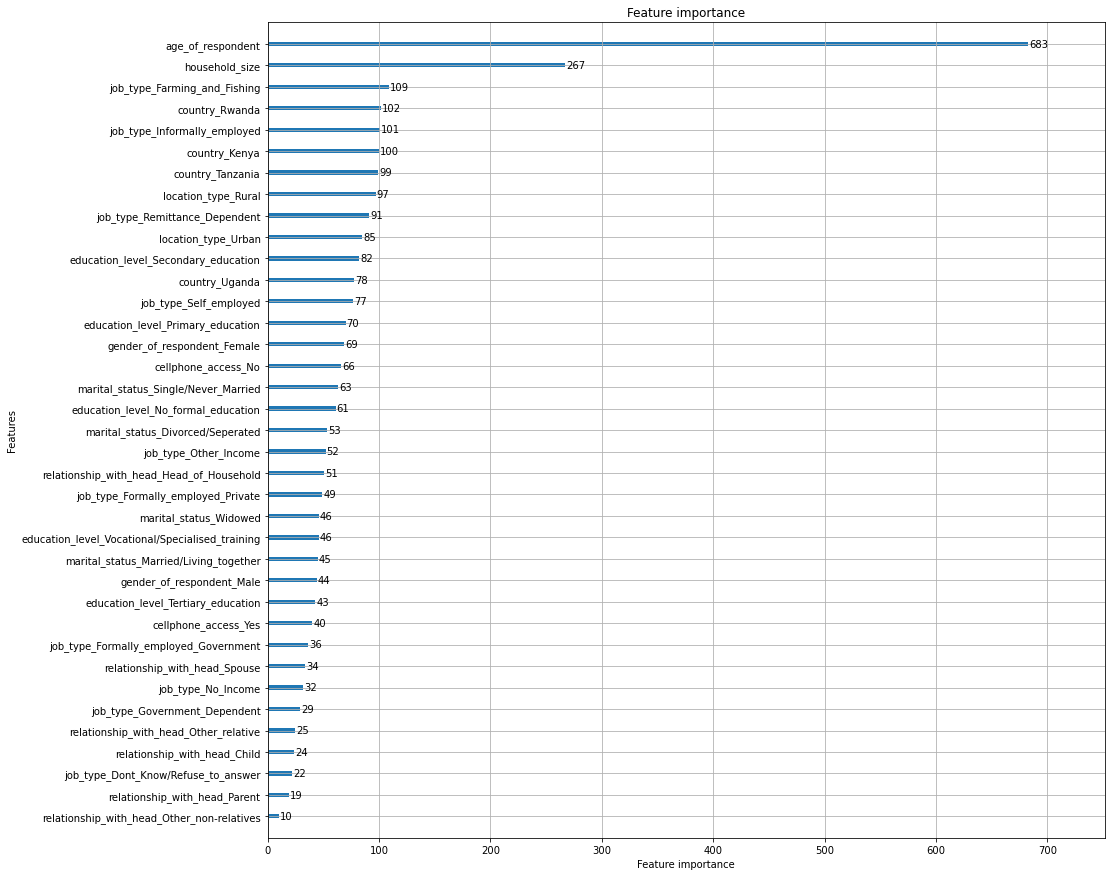

In [59]:
#Feature importance
ax = lightgbm .plot_importance(model, figsize=(15,15))
plt.show()



The removal of features with least importance doesn t seem to improve the prediction, so we leave the model as it is.

## Hypertuning 

In [60]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={#'max_depth':sp_randint(1,30),
             'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [61]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={#'max_depth':list(range(2, 30)),
             'num_leaves': list(range(10, 50))
            }

## Use of GridSearch  (Greedy algorithm) 

## Use of RandomizeSearch (Less costy in terms of computational resources and random ) 

In [62]:
model=LGBMClassifier(random_state=0, max_depth=11)

In [63]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#gs = GridSearchCV(model,param_test,scoring='accuracy', cv=5,verbose=True,n_jobs=-1)
gs =  RandomizedSearchCV(  estimator=model, param_distributions=param_test, 
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=314,
    verbose=True)
gs.fit(X_train_res, y_train_res)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.4min finished


Best score reached: 0.9042245882073555 with params: {'num_leaves': 44} 


In [64]:
pred_test_full =0
cv_score =[]
i=1

for train_index,test_index in kf.split(X_train_res,y_train_res):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train_res.loc[train_index],X_train_res.loc[test_index]
    ytr,yvl = y_train_res[train_index],y_train_res[test_index]
    
    #model
    #model1 =lgb.LGBMClassifier(random_state=0 ) 
    #model1=LGBMClassifier(random_state=0, max_depth=11 )
    model1.fit(xtr,ytr)
    score = accuracy_score(yvl,model1.predict(xvl))
    print('Accuracy score:',score)
    cv_score.append(score)    
    pred_test = model1.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1
print(' Mean Accuracy :', np.average(cv_score))

1 of KFold 5


NameError: name 'model1' is not defined

In [ ]:
model1

### Making predictions of the test set and creating a submission file

In [ ]:
# Make prediction on the test set
test_df = test_df[main_cols]
predictions = model1.predict(test_df)
# Create a submission file
sub_file = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"], "bank_account": predictions})
# Check the distribution of your predictions
sns.countplot(sub_file.bank_account);

In [ ]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Baseline22.csv', index = False)

In [ ]:
main_cols

In [ ]:
files.download('Baseline.csv') 

Text to add and dont forget to add your notebook in the github 
From this information, we see this is an imbalanced class problem. There are far more loans that were repaid on time than loans that were not repaid. Once we get into more sophisticated machine learning models, we can weight the classes by their representation in the data to reflect this imbalance.

###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************